In [18]:
# 1. Setup:


import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from wordcloud import WordCloud, STOPWORDS


In [19]:
# Plots setup


sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (16, 8)

print("Setup complet")

Setup complet


In [20]:
# 2. Load JSON

try:
    df_raw = pd.read_json("csgo_skins.json")
    print("Json Loaded")
    
except FileNotFoundError:
    print("File Not Found Error")
    
    # empty DF for instert
    df_raw = pd.DataFrame()

Json Loaded


In [21]:
# 3. Data Transformation 
# setup clean DataFrame (df_csgo)

if not df_raw.empty:
    df_csgo = pd.DataFrame()

    df_csgo["skin"] = df_raw["name"]
    df_csgo["weapon"] = df_raw["weapon"].apply(lambda x: x["name"] if isinstance(x, dict) else None)
    df_csgo["quality"] = df_raw["rarity"].apply(lambda x: x["name"] if isinstance(x, dict) else None)
    df_csgo["collection"] = df_raw["collections"].apply(lambda x: x[0]["name"] if isinstance(x, list) and len(x) > 0 else None)
    df_csgo["crate"] = df_raw["crates"].apply(lambda x: x[0]["name"] if isinstance(x, list) and len(x) > 0 else None)

else:
    df_csgo = pd.DataFrame(columns=["skin", "weapon", "quality", "collection", "crate"])




 Create Wordcloud for CS


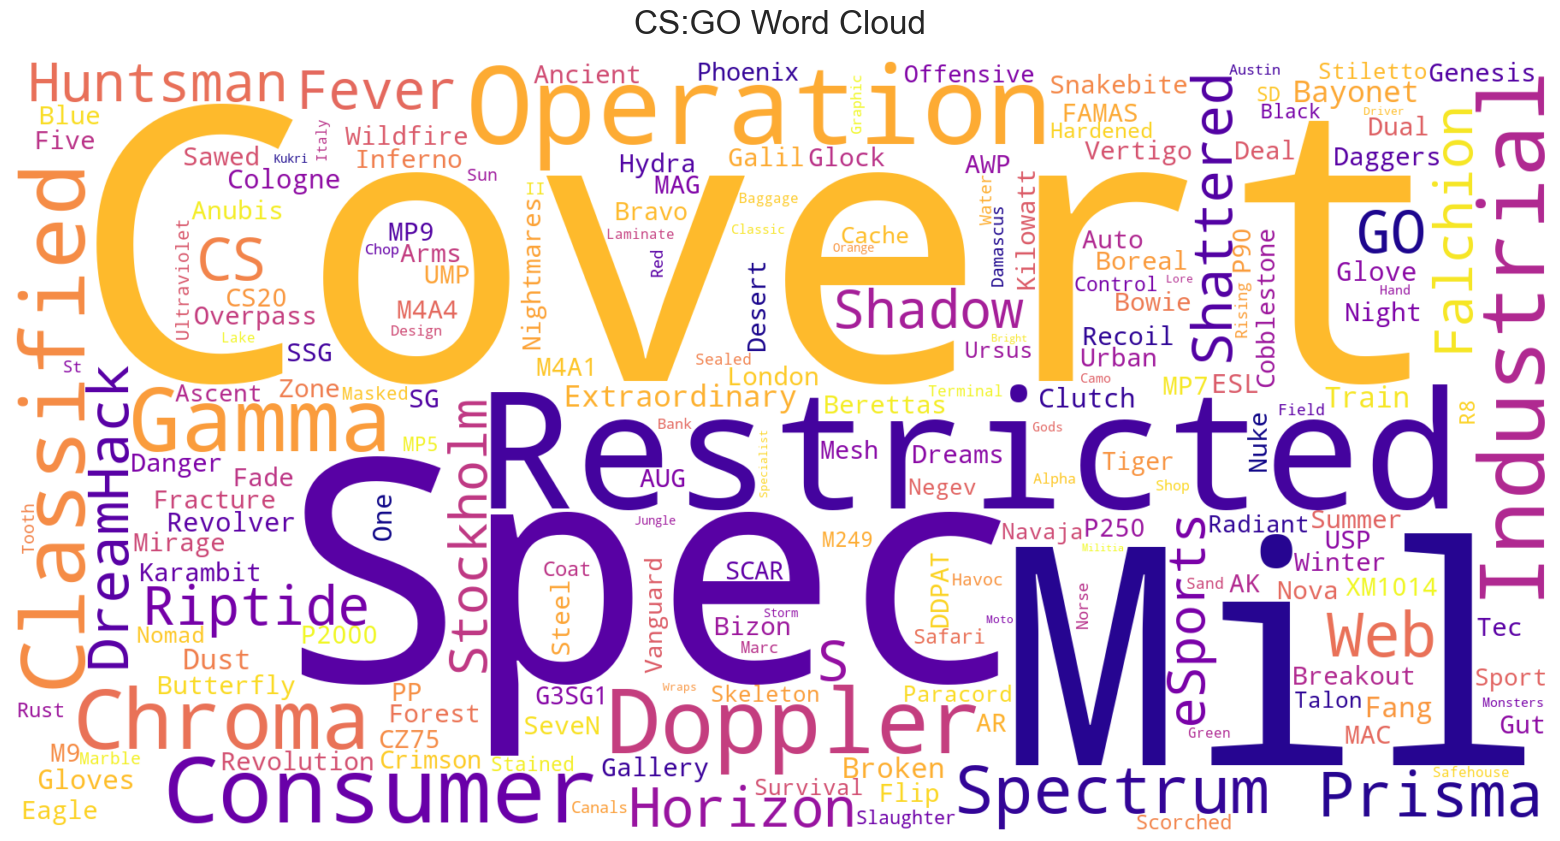

In [28]:
#  WORD CLOUDS


if not df_csgo.empty:

    print("\n Create Wordcloud for CS") #for orientation
    # Word Cloud of skin names.

    
    all_words_combined = (list(df_csgo["skin"]) + list(df_csgo["collection"]) + list(df_csgo["quality"]) + list(df_csgo["crate"]))
    text_for_combined_cloud = " ".join(str(word) for word in all_words_combined if pd.notna(word))
    stopwords = set(STOPWORDS)

    # clear out words we dont want because they are so common and dont tell us anything. Most Skins come from cases for EX. so CASE would be the biggest, similar with collection and weapon or knife.
    custom_stopwords = {"collection", "case", "package", "souvenir", "weapon", "grade", "knife"}
    
    stopwords.update(custom_stopwords)
    
    wordcloud_skins = WordCloud(width=1800, height=900, background_color="white", colormap="plasma", stopwords=stopwords, collocations=False, min_font_size=10, normalize_plurals=False).generate(text_for_combined_cloud)
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud_skins, interpolation="bilinear")
    plt.axis("off")
    plt.title("CS:GO Word Cloud", fontsize=24, pad=20)
    plt.show()

else:
    print("Dataframe empty")